In [36]:
import matplotlib.pyplot as plt
import numpy as np

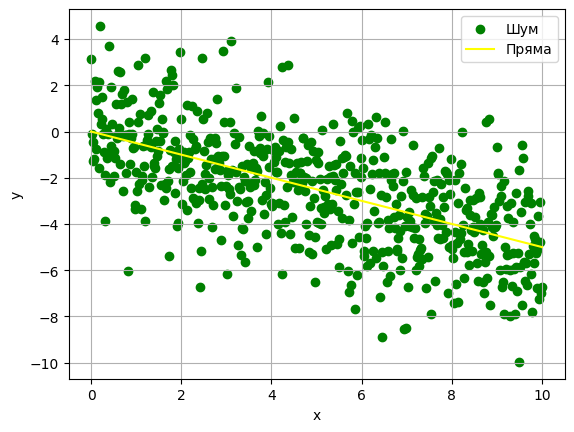

In [37]:
k = -0.5
b = 0
N = 600

x = np.linspace(0, 10, N)

noise = np.random.normal(0, 2, N)
y = k * x + b + noise

plt.scatter(x, y, label='Шум',color='green')
plt.plot(x, k * x + b, color='yellow', label='Пряма')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

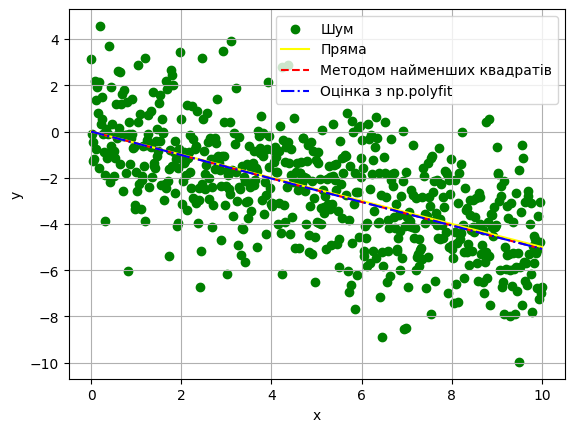

Пряма:
k = -0.5
b = 0

Параметри за методом найменших квадратів:
kk_hat = -0.5079946145997114
bb_hat = -0.0011104938917011016

Оцінки параметрів за np.polyfit:
kk_np_polyfit = -0.507994614599711
bb_np_polyfit = -0.001110493891702479


In [38]:
def least_squares_method(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_xx = np.sum(x * x)
    
    kk_hat = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x ** 2)
    bb_hat = (sum_y - kk_hat * sum_x) / n
    
    return kk_hat, bb_hat

kk_hat, bb_hat = least_squares_method(x, y)

coefficients = np.polyfit(x, y, 1)
kk_np_polyfit = coefficients[0]
bb_np_polyfit = coefficients[1]

plt.scatter(x, y, label='Шум',color='green')
plt.plot(x, k * x + b, color='yellow', label='Пряма')
plt.plot(x, kk_hat * x + bb_hat, color='red', linestyle='--', label='Методом найменших квадратів')
plt.plot(x, kk_np_polyfit * x + bb_np_polyfit, color='blue', linestyle='-.', label='Оцінка з np.polyfit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print("Пряма:")
print("k =", k)
print("b =", b)
print()
print("Параметри за методом найменших квадратів:")
print("kk_hat =", kk_hat)
print("bb_hat =", bb_hat)
print()
print("Оцінки параметрів за np.polyfit:")
print("kk_np_polyfit =", kk_np_polyfit)
print("bb_np_polyfit =", bb_np_polyfit)

-0.49736613416663894 -0.07146997794993827


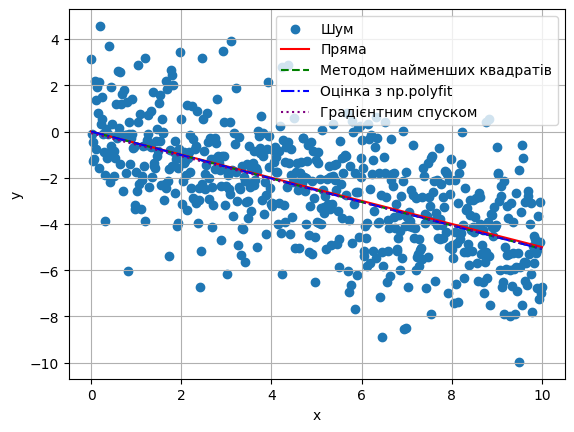

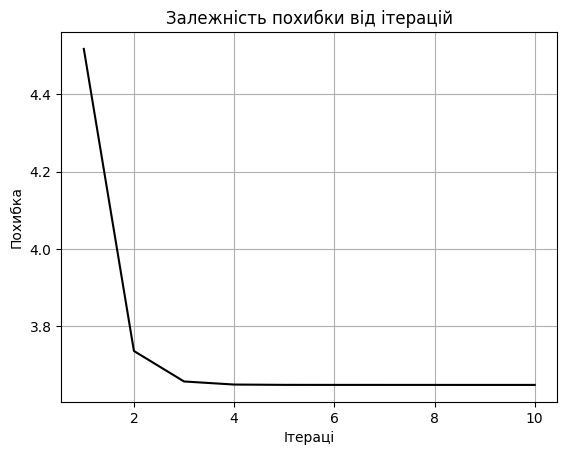

In [39]:
def gradient_descent(x, y, learning_rate, n_iter):
    kk_hat = 0
    bb_hat = 0
    n = len(x)
    
    if n_iter <= 0 or learning_rate <= 0:
        raise ValueError("Параметри learning_rate та n_iter повинні бути більше 0")
    
    for _ in range(n_iter):
        y_pred = kk_hat * x + bb_hat
        gradient_kk = (-2/n) * np.sum(x * (y - y_pred))
        gradient_bb = (-2/n) * np.sum(y - y_pred)


        kk_hat -= learning_rate * gradient_kk
        bb_hat -= learning_rate * gradient_bb
    
    return kk_hat, bb_hat


learning_rate = 0.01
n_iter = 10

kk_gradient, bb_gradient = gradient_descent(x, y, learning_rate, n_iter)
print(kk_gradient, bb_gradient)

plt.scatter(x, y, label='Шум')
plt.plot(x, k * x + b, color='red', label='Пряма')
plt.plot(x, kk_hat * x + bb_hat, color='green', linestyle='--', label='Методом найменших квадратів')
plt.plot(x, kk_np_polyfit * x + bb_np_polyfit, color='blue', linestyle='-.', label='Оцінка з np.polyfit')
plt.plot(x, kk_gradient * x + bb_gradient, color='purple', linestyle=':', label='Градієнтним спуском')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

def loss_function(x, y, kk, bb):
    "обчислює середньоквадратичну помилку між прогнозованими значеннями y_pred та істинними значеннями y"
    y_pred = kk * x + bb
    return np.mean((y_pred - y) ** 2)

errors = []
iterations = range(1, n_iter + 1)

for i in iterations:

    kk_gradient, bb_gradient = gradient_descent(x, y, learning_rate, i)
    
    error = loss_function(x, y, kk_gradient, bb_gradient)
    errors.append(error)

plt.plot(iterations, errors, color='black')
plt.xlabel('Ітераці')
plt.ylabel('Похибка')
plt.title('Залежність похибки від ітерацій')
plt.grid(True)
plt.show()